In [1]:
import statistics
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from IPython.display import display, Math
from scipy.stats import norm
from scipy.stats import chi2
from scipy.stats import t
from scipy.stats import f
from scipy.stats import expon
from scipy.stats import poisson
from scipy.stats import bernoulli
from scipy.stats import uniform
from scipy.stats import ksone

### Metropolis-Hasting alghorithm

#### Posterior $\alpha$ = Aprior * likelihood

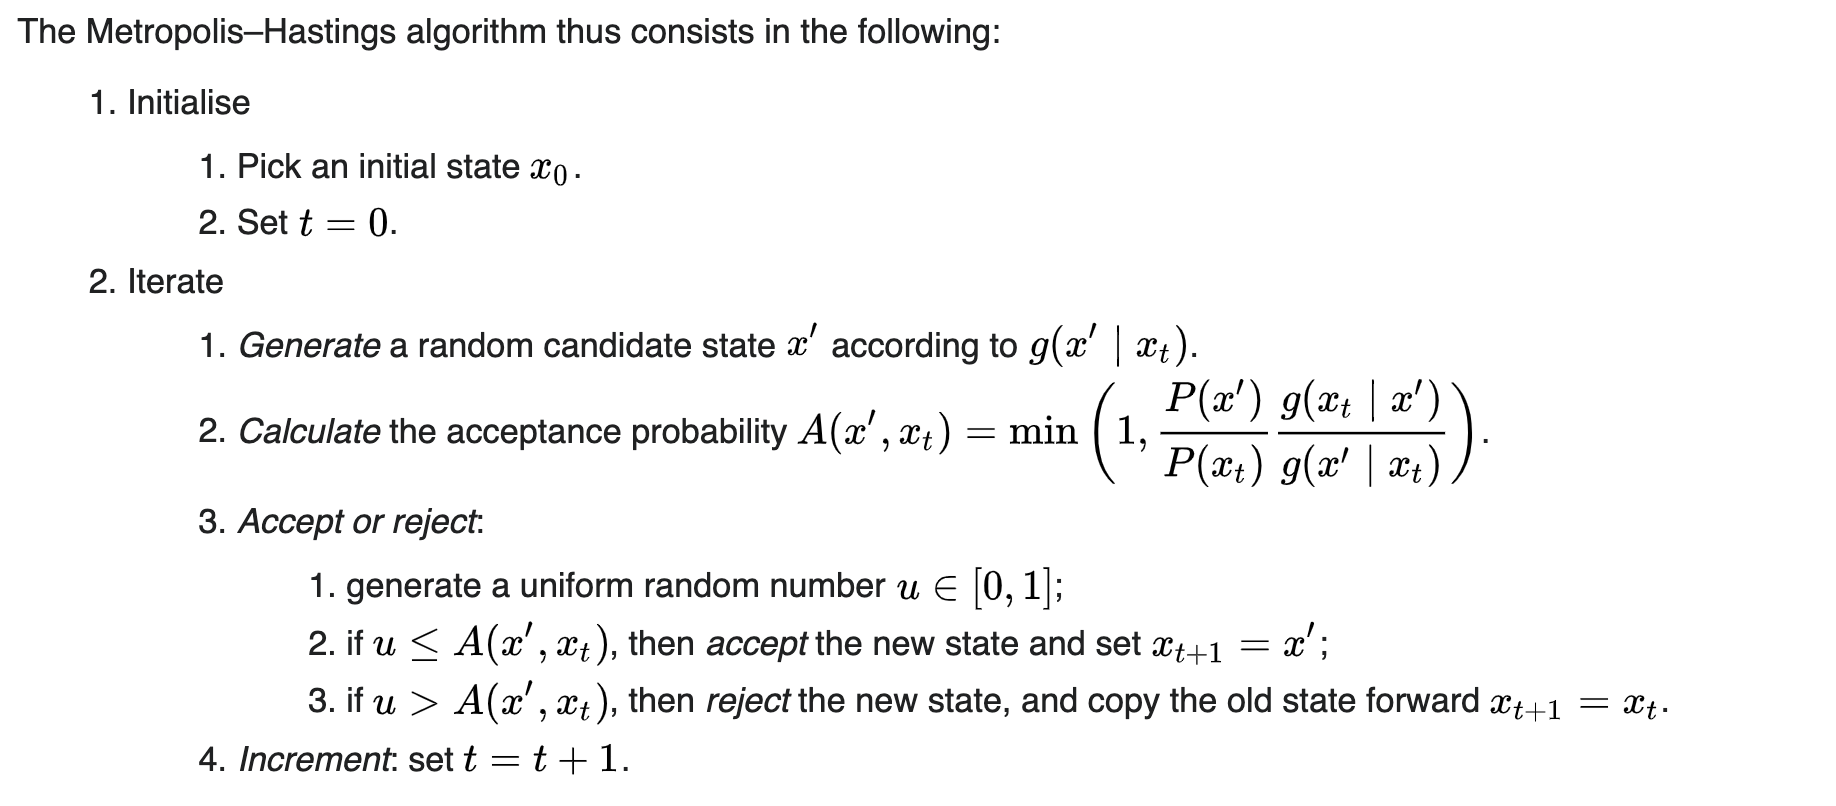

#### Вероятность одобрения

In [ ]:
n = int(input('степень t :'))
first = float(input('Первоначальная точка = '))
second = float(input('Финальная точка = '))
print(min(1, (second/first) ** n))

## Выборочные характеристики

In [ ]:
d = list(map(int, input().split()))
point_x = float(input('point_x = '))
print('****')
print('Выборочное(первый момент) среднее: ', statistics.mean(d))
print('Неисправленная выборочная диперсия:', (len(d) - 1)/(len(d))*statistics.variance(d))
print('(Несмещенная) Исправленная выборочная диперсия:', statistics.variance(d))
print('****')
print('Выборочный второй начальный момент:', sum([(i ** 2) for i in d])/len(d))
print('Выборочный третий начальный момент:', sum([(i ** 3) for i in d])/len(d))
print('Выборочный четвертый начальный момент:', sum([(i ** 4) for i in d])/len(d))
print('****')
print('Выборочный второй центральный момент:', scipy.stats.moment(d, moment = 2))
print('Выборочный третий центральный момент:', scipy.stats.moment(d, moment = 3))
print('Выборочный четвертый центральный момент:', scipy.stats.moment(d, moment = 4))
print('****')
d.sort()
print('Вариационный ряд:', d)
print('Первый член вариационного ряда:', d[1 - 1])  #или любой другой член
print('Последний член вариационного ряда:', d[-1])
print('------------------')
print('****')
freq = list()
for i in set(d):
    d.count(i)
    freq.append(d.count(i) / len(d))
freq
x_axis = list(set(d))
x_axis.sort()
x_axis
print(x_axis)
print(np.insert(np.cumsum(freq), 0, 0))
for i in range(len(d) - 1):
    if point_x > d[i] and point_x < d[i + 1]:
        print('Prob of point_x = ', np.cumsum(freq)[i])
if point_x > d[-1]:
    print('Prob of point_x = ', 1)
if point_x < d[0]:
    print('Prob of point_x = ', 0)
plt.bar(x_axis, np.cumsum(freq), color='indigo', edgecolor='black', align='edge', width=1);
plt.title('Distirbution function');
plt.xlabel('Sample elements');
plt.ylabel('Probability');

### Подсчеты вероятностей

$Normal$

In [ ]:
n = 1 ### point
print('----------------')
display(Math('P(N < {}) = {}'.format(n,round(norm.cdf(n), 4), k)))
display(Math('P(N > {}) = {}'.format(n,round(1 - norm.cdf(n), 4), k)))

$\chi2$

In [ ]:
n = 1 ### point
k = 1 ### dof
print('----------------')
display(Math('P(\chi2 < {}) = {}, dof = {}'.format(n,round(chi2.cdf(n, k), 4), k)))
display(Math('P(\chi2 > {}) = {}, dof = {}'.format(n,round(1 - chi2.cdf(n, k), 4), k)))

$T - distribution$

In [ ]:
n = 1 ### point
k = 1 ### dof
print('----------------')
display(Math('P(t < {}) = {}, dof = {}'.format(n,round(t.cdf(n, k), 4), k)))
display(Math('P(t > {}) = {}, dof = {}'.format(n,round(1 - t.cdf(n, k), 4), k)))

$F - distribution$

In [ ]:
n = 0.25 ### point
dof1 = 1 ### dof1
dof2 = 4 ### dof2
print('----------------')
display(Math('P(F < {}) = {}'.format(n,round(f.cdf(n, dof1, dof2), 4))))
display(Math('P(F > {}) = {}'.format(n,round(f.sf(n, dof1, dof2), 4))))

### Колмагоров

CDF

In [ ]:
n = 3 ### observations
point = 0.1 ### point
ksone.cdf(point, n)

PPF

In [ ]:
n = 3 ### observations
alpha = 0.1 ### point
ksone.ppf(alpha, n)

### Длина ДИ

$L= 2 * z_{\frac {\alpha} {2}} * \frac {\sigma} {\sqrt {n}}$

### $\sigma$

In [ ]:
ci = int(input('ci percentage = ')) ### percentage of ci interval
n = int(input('observations = ')) ### observation
sigma2 = float(input('sigma^2 = ')) ### sigma^2
print('---------------')
point = abs(norm.ppf(((100 - ci) / 2) / 100))
print('L =', round(2*point*((sigma2 / n) ** 0.5), 4))

ci percentage = 95
observations = 10


### $Fisher$ 

In [ ]:
ci = int(input('ci percentage = ')) ### percentage of ci interval
fisher = float(input('Fisher = ')) ### observation
print('---------------')
point = abs(norm.ppf(((100 - ci) / 2) / 100))
print('L =', round(2*point*(1 / fisher) ** 0.5, 4))

### Подсчет несмещенных дисперсий

$\hat \sigma^2 = \frac {1} {n-1} * \sum ({X_i - \overline X})^2$

In [ ]:
n = int(input('observations_1 = '))
m = int(input('observations_2 = '))
diffX = float(input('sum(X_i-\hat X) = '))
diffY = float(input('sum(Y_i-\hat Y) = '))
sigma1 = 1 / (n - 1) * 120
sigma2 = 1 / (m - 1) * 400
display(Math('\sigma_1 = {}, \sigma_2 = {}'.format(sigma1, sigma2)))
display(Math('\sigma_1 / \sigma_2 = {}'.format(sigma1/sigma2)))
display(Math('\sigma_2 / \sigma_1 = {}'.format(sigma2/sigma1)))

### Тест правдоподобия

In [2]:
l_1 = float(input('l_1 = '))
l_likelihood = float(input('l_mle = '))
print('LRT Statistics = ', -2*(l_1 - l_likelihood))

l_1 = -150
l_mle = -135
LRT Statistics =  30.0


### Дисперсия

In [ ]:
sumx = 33
sumx2 = 100
n = 11

s2 = 1 / n * sumx2 - 1 / n * ((sumx)**2)
s2fix = n / (n - 1) * s2
s2fix